# Preparing Data for Modelling

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# testing - 1
    cleaned=pd.read_csv("D:/github/dataSets/dpa_project/updatedcv.csv")

cleaned.drop(["url","lat","long","id","model","region"],axis=1,inplace=True)

cleaned.drop(cleaned[cleaned["title_status"]=="parts only"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="missing"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="lien"].index,inplace=True)

northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]

for index, row in cleaned.iterrows():
    if(row["state"] in northeast):
        cleaned.at[index,"state"]="northeast"
    if(row["state"] in midwest):
        cleaned.at[index,"state"]="midwest"
    if(row["state"] in south):
        cleaned.at[index,"state"]="south"
    if(row["state"] in west):
        cleaned.at[index,"state"]="west"

yearmed=cleaned["year"].median()
cleaned["year"].fillna(yearmed)
for index, row in cleaned.iterrows():
    if(row["year"]>2020):
        cleaned.at[index,"year"]=yearmed

pricemed=cleaned["price"].median()
for index, row in cleaned.iterrows():
    if(row["price"]<2000):
        cleaned.at[index,"price"]=pricemed
    if(row["price"]>40000):
        cleaned.at[index,"price"]=pricemed

In [ ]:
# testing - 2
cleaned=pd.read_csv("D:/github/dataSets/dpa_project/cleanedDataForModelling.csv")



In [6]:
cleaned=pd.read_csv("D:/github/dataSets/dpa_project/updatedcv.csv")
cleaned.drop(["url","lat","long","id","model","region"],axis=1,inplace=True)

cleaned.drop(cleaned[cleaned["title_status"]=="parts only"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="missing"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="lien"].index,inplace=True)

northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]

for index, row in cleaned.iterrows():
    if(row["state"] in northeast):
        cleaned.at[index,"state"]="northeast"
    if(row["state"] in midwest):
        cleaned.at[index,"state"]="midwest"
    if(row["state"] in south):
        cleaned.at[index,"state"]="south"
    if(row["state"] in west):
        cleaned.at[index,"state"]="west"

yearmed=cleaned["year"].median()
cleaned["year"].fillna(yearmed)
for index, row in cleaned.iterrows():
    if(row["year"]>2020):
        cleaned.at[index,"year"]=yearmed

pricemed=cleaned["price"].median()
for index, row in cleaned.iterrows():
    if(row["price"]<2000):
        cleaned.at[index,"price"]=pricemed
    if(row["price"]>40000):
        cleaned.at[index,"price"]=pricemed

In [5]:
# testing 
cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
0,17899,2012.0,volkswagen,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black,west,8
1,11803,2015.0,gmc,excellent,6 cylinders,gas,7554.0,clean,automatic,4wd,truck,white,west,5
2,11803,2018.0,ford,like new,6 cylinders,diesel,70150.0,clean,automatic,4wd,pickup,white,west,2
3,13999,2009.0,ram,good,6 cylinders,gas,120057.0,clean,automatic,4wd,pickup,silver,west,11
4,34500,2017.0,ford,excellent,6 cylinders,diesel,95484.0,clean,automatic,4wd,pickup,white,west,3


In [13]:
cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,17899,2012.0,volkswagen,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black,west
1,10500,2015.0,gmc,excellent,6 cylinders,gas,7554.0,clean,automatic,4wd,truck,white,west
2,10500,2018.0,ford,like new,6 cylinders,diesel,70150.0,clean,automatic,4wd,pickup,white,west
3,13999,2009.0,ram,good,6 cylinders,gas,120057.0,clean,automatic,4wd,pickup,silver,west
4,34500,2017.0,ford,excellent,6 cylinders,diesel,95484.0,clean,automatic,4wd,pickup,white,west


In [6]:
# testing
y=cleaned["price"]
x=cleaned.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
y=cleaned["price"]
x=cleaned.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
# testing
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()

x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()

x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin)) 

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [16]:
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()

x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()

x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin)) 

C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
# TESTING
y_trmin=y_train.min()
y_trmax=y_train.max()
y_train=((y_train-y_trmin)/(y_trmax-y_trmin))

x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin)) 

y_test=((y_test-y_trmin)/(y_trmax-y_trmin)) 

y_test.head()

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


340644    0.328816
104879    0.605000
59683     0.257974
4598      0.269737
297188    0.131526
Name: price, dtype: float64

In [18]:
y_trmin=y_train.min()
y_trmax=y_train.max()
y_train=((y_train-y_trmin)/(y_trmax-y_trmin)) 

In [19]:
x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin)) 

C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
y_test=((y_test-y_trmin)/(y_trmax-y_trmin)) 

In [21]:
y_test.head()

446968    0.025000
13684     0.117816
184355    0.789316
376931    0.000000
328645    0.223684
Name: price, dtype: float64

In [9]:
# TESTING

ordinal_columns=["cylinders"]

for col in ordinal_columns:
     le = LabelEncoder()
     le.fit_transform(list(x_train[col].astype(str).values))
     x_train[col] = le.transform(list(x_train[col].astype(str).values))

for col in ordinal_columns:
    le.fit(list(x_test[col].astype(str).values))
    x_test[col] = le.transform(list(x_test[col].astype(str).values))
    
x_train.head()

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
16150,0.500000,ram,fair,5,diesel,0.783328,clean,automatic,4wd,pickup,blue,west,15
283323,0.366667,chevrolet,good,3,gas,0.236639,clean,automatic,2wd,truck,white,midwest,19
192082,0.400000,ram,good,6,gas,0.179907,clean,automatic,2wd,truck,white,northeast,18
331935,0.800000,kia,excellent,5,gas,0.342767,clean,automatic,4wd,SUV,white,south,6
11088,0.600000,chevrolet,excellent,6,gas,0.336643,clean,automatic,4wd,truck,custom,south,12


In [23]:
ordinal_columns=["cylinders"]

for col in ordinal_columns:
     le = LabelEncoder()
     le.fit_transform(list(x_train[col].astype(str).values))
     x_train[col] = le.transform(list(x_train[col].astype(str).values))

for col in ordinal_columns:
    le.fit(list(x_test[col].astype(str).values))
    x_test[col] = le.transform(list(x_test[col].astype(str).values))

C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [24]:
x_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
313199,0.966667,ford,good,3,gas,0.004175,clean,automatic,2wd,sedan,silver,south
177284,0.866667,ford,excellent,6,gas,0.022400,clean,automatic,2wd,truck,white,south
265564,0.883333,jeep,salvage,5,gas,0.014539,clean,automatic,4wd,sedan,white,midwest
283576,0.825000,unknown,fair,5,diesel,0.028500,clean,automatic,4wd,sedan,white,south
440590,0.925000,unknown,good,5,electric,0.011546,clean,other,4wd,sedan,white,south


In [ ]:
xx_train=pd.get_dummies(x_train)

In [27]:
xx_test=pd.get_dummies(x_test)
missing_cols=set(xx_train.columns)-set(xx_test.columns)
for val in missing_cols:
    xx_test[val]=0
xx_test=xx_test[xx_train.columns]

In [28]:
xx_train.head()

,year,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
313199,0.966667,3,0.004175,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
177284,0.866667,6,0.022400,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
265564,0.883333,5,0.014539,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
283576,0.825000,5,0.028500,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
440590,0.925000,5,0.011546,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
xx_test.head()

,year,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
446968,0.883333,5,0.014434,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13684,0.908333,5,0.010027,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
184355,0.975000,5,0.003980,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
376931,0.958333,3,0.003800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
328645,0.966667,5,0.005281,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## End

In [208]:
trial1.info()
#trial1.manufacturer.value_counts().sort_values(ascending=False)
trial1.transmission.value_counts()

trial1.groupby(['manufacturer']).describe()['price']
#trial1[(trial1.transmission=="type")]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446992 entries, 0 to 446991
Data columns (total 12 columns):
price           446992 non-null int64
year            446992 non-null float64
manufacturer    446992 non-null object
model           446992 non-null object
condition       446992 non-null object
cylinders       446992 non-null int64
fuel            446992 non-null object
odometer        446992 non-null float64
title_status    446992 non-null object
transmission    446992 non-null object
drive           446992 non-null int64
type            446992 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 40.9+ MB


,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
acura,3668.0,9867.636041,8988.556622,750.0,4399.75,7900.0,12991.00,144888.0
alfa-romeo,78.0,21546.102564,12853.776949,1800.0,9992.50,22995.0,27421.00,68875.0
aston-martin,20.0,59519.650000,25246.588998,22900.0,46864.50,53947.5,65000.00,119888.0
audi,4949.0,14810.582542,10862.477173,750.0,7000.00,12995.0,19483.00,124977.0
bmw,12185.0,13906.431596,10472.451299,750.0,6444.00,11495.0,18999.00,139995.0
buick,5497.0,9625.298345,6896.028857,750.0,3950.00,8088.0,14500.00,125000.0
cadillac,6510.0,13493.650384,11150.725553,750.0,5495.00,10263.5,17995.00,79995.0
chevrolet,64857.0,14543.018163,11262.196624,750.0,5950.00,11950.0,19995.00,149980.0
chrysler,7788.0,8401.961222,6744.733802,750.0,3500.00,6450.0,11495.00,64000.0


In [209]:
# Encoding "manufacturer" feature
# trial1 = pd.concat([ce.BinaryEncoder(cols=['manufacturer']).fit_transform(trial1)],axis=1)
top_10 = trial1.manufacturer.value_counts(ascending=False).head(11)
top_10_names = [x for x in top_10.index]
top_10_names.pop(-3)
top_10_names

premium = ['acura','alfa-romeo','aston-martin','audi', 'bmw','cadillac', 'ferrari','gmc','harley-davidson','hennessey','jeep','lexus','lincoln','mercedes-benz','morgan','ram','tesla']

for label in top_10_names:
    trial1[label] = np.where(trial1['manufacturer']==label,1,0)

trial1['premium'] = trial1['manufacturer'].apply(lambda x:1 if (x in premium) else 0)
trial1.head(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,chevrolet,toyota,ram,honda,nissan,jeep,gmc,dodge,bmw,premium
0,17899,2012.0,volkswagen,golf r,excellent,4,gas,63500.0,clean,manual,...,0,0,0,0,0,0,0,0,0,0
1,46463,2015.0,gmc,sierra 1500,excellent,6,gas,7554.0,clean,automatic,...,0,0,0,0,0,0,1,0,0,1
2,49999,2018.0,ford,f-450,like new,6,diesel,70150.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
3,13999,2009.0,ram,unknown,good,6,gas,120057.0,clean,automatic,...,0,0,1,0,0,0,0,0,0,1
4,34500,2017.0,ford,f-350,excellent,6,diesel,95484.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
5,14500,2007.0,gmc,sierra,excellent,6,gas,89340.0,clean,automatic,...,0,0,0,0,0,0,1,0,0,1
6,12500,2013.0,ford,f-250,fair,6,gas,226031.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
7,34500,2012.0,ram,unknown,salvage,6,diesel,128153.0,clean,automatic,...,0,0,1,0,0,0,0,0,0,1
8,5900,1994.0,ford,f-250,salvage,6,gas,168838.0,clean,manual,...,0,0,0,0,0,0,0,0,0,0
9,16500,2013.0,gmc,yukon,salvage,6,other,156385.0,clean,automatic,...,0,0,0,0,0,0,1,0,0,1


In [210]:
# Encoding "model" feature

top_10_model = trial1.model.value_counts(ascending=False).head(11)
top_10_model_names = [x for x in top_10_model.index]
top_10_model_names.pop(2)
top_10_model_names



['f-150',
 'silverado 1500',
 '1500',
 'silverado',
 '2500',
 'wrangler',
 'accord',
 'camry',
 'altima',
 'grand cherokee']

In [211]:
for label1 in top_10_model_names:
    trial1[label1] = np.where(trial1['model']==label1,1,0)

trial1.head(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,f-150,silverado 1500,1500,silverado,2500,wrangler,accord,camry,altima,grand cherokee
0,17899,2012.0,volkswagen,golf r,excellent,4,gas,63500.0,clean,manual,...,0,0,0,0,0,0,0,0,0,0
1,46463,2015.0,gmc,sierra 1500,excellent,6,gas,7554.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
2,49999,2018.0,ford,f-450,like new,6,diesel,70150.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
3,13999,2009.0,ram,unknown,good,6,gas,120057.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
4,34500,2017.0,ford,f-350,excellent,6,diesel,95484.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
5,14500,2007.0,gmc,sierra,excellent,6,gas,89340.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
6,12500,2013.0,ford,f-250,fair,6,gas,226031.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
7,34500,2012.0,ram,unknown,salvage,6,diesel,128153.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
8,5900,1994.0,ford,f-250,salvage,6,gas,168838.0,clean,manual,...,0,0,0,0,0,0,0,0,0,0
9,16500,2013.0,gmc,yukon,salvage,6,other,156385.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0


In [212]:
# Encoding "condition" feature
trial1['condition'] = trial1['condition'].map({'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new': 4, 'new': 5})

# Encoding "fuel" feature
trial1['fuel'] = trial1['fuel'].map({'gas': 0, 'hybrid': 1, 'diesel': 2, 'electric': 3, 'other': 4})

# Encoding "title_status" feature
trial1 = pd.get_dummies(trial1, prefix=['title'], columns = ['title_status'], drop_first=True)

# Encoding "transmission" feature
trial1['transmission'] = trial1['transmission'].map({'manual': 0, 'automatic': 1, 'other': 2})

# Encoding "type" feature
trial1['type'] = trial1['type'].map({'mini-van': 0, 'hatchback': 1, 'wagon': 2, 'sedan': 3, 'van': 4, 'SUV': 5, 'convertible': 6, 'coupe': 7,'offroad': 8, 'other':9, 'truck':10, 'pickup':11, 'bus':12})

trial1.head()

#for cols in categoricalCols:
#    if cols in trial1.columns:
#        le = LabelEncoder()
#        train0[[col]] = train0[[col]].apply(le.fit_transform)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,...,wrangler,accord,camry,altima,grand cherokee,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage
0,17899,2012.0,volkswagen,golf r,3,4,0,63500.0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,46463,2015.0,gmc,sierra 1500,3,6,0,7554.0,1,4,...,0,0,0,0,0,0,0,0,0,0
2,49999,2018.0,ford,f-450,4,6,2,70150.0,1,4,...,0,0,0,0,0,0,0,0,0,0
3,13999,2009.0,ram,unknown,2,6,0,120057.0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,34500,2017.0,ford,f-350,3,6,2,95484.0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [213]:
trial1 = trial1.drop(columns = ['manufacturer','model'])
trial1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446992 entries, 0 to 446991
Data columns (total 35 columns):
price               446992 non-null int64
year                446992 non-null float64
condition           446992 non-null int64
cylinders           446992 non-null int64
fuel                446992 non-null int64
odometer            446992 non-null float64
transmission        446992 non-null int64
drive               446992 non-null int64
type                446992 non-null int64
ford                446992 non-null int32
chevrolet           446992 non-null int32
toyota              446992 non-null int32
ram                 446992 non-null int32
honda               446992 non-null int32
nissan              446992 non-null int32
jeep                446992 non-null int32
gmc                 446992 non-null int32
dodge               446992 non-null int32
bmw                 446992 non-null int32
premium             446992 non-null int64
f-150               446992 non-null int32
sil

# SUKESH

# Modelling

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

# model tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [5]:
valid_part = 0.3
pd.set_option('max_columns',100)

In [6]:
train0 = pd.read_csv(r'C:/Users/navii/OneDrive/Desktop/cleanedData.csv')

train0.head()

,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,age
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black,west,40.760779,-111.891047,8
1,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,6 cylinders,gas,7554.0,clean,automatic,4wd,truck,white,west,40.760779,-111.891047,5
2,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,49999,2018.0,ford,f-450,like new,6 cylinders,diesel,70150.0,clean,automatic,4wd,pickup,white,west,40.760779,-111.891047,2
3,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,13999,2009.0,ram,unknown,good,6 cylinders,gas,120057.0,clean,automatic,4wd,pickup,silver,west,40.760779,-111.891047,11
4,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,34500,2017.0,ford,f-350,excellent,6 cylinders,diesel,95484.0,clean,automatic,4wd,pickup,white,west,40.760779,-111.891047,3


In [7]:
train0.title_status.value_counts()

clean      355515
rebuilt      9357
Name: title_status, dtype: int64

In [5]:
#train0 = pd.read_csv(r'D:/Projects/DPA/Used-Cars-Analysis/data/vehicles_1.csv')

#train0.head()

In [8]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364872 entries, 0 to 364871
Data columns (total 20 columns):
id              364872 non-null int64
url             364872 non-null object
region          364872 non-null object
price           364872 non-null int64
year            364872 non-null float64
manufacturer    364872 non-null object
model           364872 non-null object
condition       364872 non-null object
cylinders       364872 non-null object
fuel            364872 non-null object
odometer        364872 non-null float64
title_status    364872 non-null object
transmission    364872 non-null object
drive           364872 non-null object
type            364872 non-null object
paint_color     364872 non-null object
state           364872 non-null object
lat             364872 non-null float64
long            364872 non-null float64
age             364872 non-null int64
dtypes: float64(4), int64(3), object(13)
memory usage: 55.7+ MB


In [9]:
drop_columns = ['id','url', 'region', 'model', 'state', 'lat','long']
train0 = train0.drop(columns = drop_columns)

In [10]:
null_values=train0.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(train0)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
price,0,0.0
year,0,0.0
manufacturer,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0
drive,0,0.0


In [11]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364872 entries, 0 to 364871
Data columns (total 13 columns):
price           364872 non-null int64
year            364872 non-null float64
manufacturer    364872 non-null object
condition       364872 non-null object
cylinders       364872 non-null object
fuel            364872 non-null object
odometer        364872 non-null float64
title_status    364872 non-null object
transmission    364872 non-null object
drive           364872 non-null object
type            364872 non-null object
paint_color     364872 non-null object
age             364872 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 36.2+ MB


In [12]:
# Encoding the categorical features
categorical_columns = train0.select_dtypes(exclude=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        train0[[col]] = train0[[col]].apply(le.fit_transform)

In [13]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364872 entries, 0 to 364871
Data columns (total 13 columns):
price           364872 non-null int64
year            364872 non-null float64
manufacturer    364872 non-null int32
condition       364872 non-null int32
cylinders       364872 non-null int32
fuel            364872 non-null int32
odometer        364872 non-null float64
title_status    364872 non-null int32
transmission    364872 non-null int32
drive           364872 non-null int32
type            364872 non-null int32
paint_color     364872 non-null int32
age             364872 non-null int64
dtypes: float64(2), int32(9), int64(2)
memory usage: 23.7 MB


In [14]:
# Thanks to : https://www.kaggle.com/aantonova/some-new-risk-and-clusters-features
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [15]:
train0 = reduce_mem_usage(train0)

Mem. usage decreased to  6.96 Mb (70.6% reduction)


In [16]:
train0.corr()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
price,1.000000,0.562871,-0.000588,0.221167,0.218344,-0.217669,-0.501778,-0.048413,0.027228,0.259453,0.033744,0.031498,-0.562871
year,0.562871,1.000000,0.001533,0.221608,-0.093188,0.068125,-0.633109,0.044950,-0.016553,0.046318,0.015274,0.017696,-1.000000
manufacturer,-0.000588,0.001533,1.000000,0.012509,-0.173749,-0.048192,-0.011768,0.010021,0.062512,0.001683,0.037312,0.002158,-0.001533
condition,0.221167,0.221608,0.012509,1.000000,0.003745,0.036998,-0.287501,0.003510,0.045484,0.029913,0.043924,0.011094,-0.221608
cylinders,0.218344,-0.093188,-0.173749,0.003745,1.000000,-0.098860,0.093010,-0.068848,-0.044223,0.270250,0.059292,0.053593,0.093188
fuel,-0.217669,0.068125,-0.048192,0.036998,-0.098860,1.000000,-0.122484,0.012958,0.023316,-0.107617,-0.130914,-0.047377,-0.068125
odometer,-0.501778,-0.633109,-0.011768,-0.287501,0.093010,-0.122484,1.000000,-0.064677,-0.064371,0.019692,0.010312,-0.000991,0.633109
title_status,-0.048413,0.044950,0.010021,0.003510,-0.068848,0.012958,-0.064677,1.000000,-0.015368,-0.015142,0.009746,-0.010018,-0.044950
transmission,0.027228,-0.016553,0.062512,0.045484,-0.044223,0.023316,-0.064371,-0.015368,1.000000,-0.036336,-0.015566,-0.018533,0.016553
drive,0.259453,0.046318,0.001683,0.029913,0.270250,-0.107617,0.019692,-0.015142,-0.036336,1.000000,-0.050574,0.055589,-0.046318


In [15]:
#train0 = train0[train0['price'] > 1000]
#train0 = train0[train0['price'] < 40000]
# Rounded ['odometer'] to 5000
#train0['odometer'] = train0['odometer'] // 5000
#train0 = train0[train0['year'] > 110]

In [17]:
train0.corr()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
price,1.000000,0.562871,-0.000588,0.221167,0.218344,-0.217669,-0.501778,-0.048413,0.027228,0.259453,0.033744,0.031498,-0.562871
year,0.562871,1.000000,0.001533,0.221608,-0.093188,0.068125,-0.633109,0.044950,-0.016553,0.046318,0.015274,0.017696,-1.000000
manufacturer,-0.000588,0.001533,1.000000,0.012509,-0.173749,-0.048192,-0.011768,0.010021,0.062512,0.001683,0.037312,0.002158,-0.001533
condition,0.221167,0.221608,0.012509,1.000000,0.003745,0.036998,-0.287501,0.003510,0.045484,0.029913,0.043924,0.011094,-0.221608
cylinders,0.218344,-0.093188,-0.173749,0.003745,1.000000,-0.098860,0.093010,-0.068848,-0.044223,0.270250,0.059292,0.053593,0.093188
fuel,-0.217669,0.068125,-0.048192,0.036998,-0.098860,1.000000,-0.122484,0.012958,0.023316,-0.107617,-0.130914,-0.047377,-0.068125
odometer,-0.501778,-0.633109,-0.011768,-0.287501,0.093010,-0.122484,1.000000,-0.064677,-0.064371,0.019692,0.010312,-0.000991,0.633109
title_status,-0.048413,0.044950,0.010021,0.003510,-0.068848,0.012958,-0.064677,1.000000,-0.015368,-0.015142,0.009746,-0.010018,-0.044950
transmission,0.027228,-0.016553,0.062512,0.045484,-0.044223,0.023316,-0.064371,-0.015368,1.000000,-0.036336,-0.015566,-0.018533,0.016553
drive,0.259453,0.046318,0.001683,0.029913,0.270250,-0.107617,0.019692,-0.015142,-0.036336,1.000000,-0.050574,0.055589,-0.046318


### Preparaing to the Modelling

In [18]:
y = train0['price']
X = train0.drop('price',axis=1)

#y = sample['price']
#X = sample.drop('price',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(291897, 12) (291897,)
(72975, 12) (72975,)


In [20]:
train, test, target, target_test = train_test_split(X, y, test_size=valid_part, random_state=0)

#### Min-max scaler:


#### For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(train)
X_test= sc.transform(test)

In [23]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [24]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [25]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', y_train[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(y_train, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(y_train, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(y_train, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)
    
    #print('Accuracy for train',model.score(target, ytrain))


    print('target_test =', y_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(y_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(y_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(y_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)
    
    #print('Accuracy for test',model.score(target_test, ytest))


In [ ]:
# Support Vector Machines
svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

In [69]:
# Linear SVR

linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(1,linear_svr,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [22039.15438568 14233.52432095 16170.22938809 21654.14011425
 16329.64495431]
acc(r2_score) for train = -18.66
acc(relative error) for train = 46.91
acc(rmse) for train = 991329.31
target_test = [10997 15750  8995  4990 17940]
ytest = [16241.39845837 16325.2976051   7620.02717559  9428.38187242
 17195.11416565]
acc(r2_score) for test = -25.23
acc(relative error) for test = 46.91
acc(rmse) for test = 1019462.37


In [ ]:

mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

In [71]:
sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(3,sgd,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [3.88674450e+14 3.35245157e+14 3.96019461e+14 4.11452768e+14
 3.54667318e+14]
acc(r2_score) for train = -1.7923075588900295e+23
acc(relative error) for train = 2964585502346.08
acc(rmse) for train = 3.852774956121168e+16
target_test = [10997 15750  8995  4990 17940]
ytest = [4.06185948e+14 3.97234799e+14 3.79723910e+14 3.31813377e+14
 3.93907651e+14]
acc(r2_score) for test = -1.7890815125737667e+23
acc(relative error) for test = 2962081921356.34
acc(rmse) for test = 3.8533247130159624e+16


In [70]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(2,random_forest,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [23676.19404762  7095.5        14410.525      27396.15
 21211.25332168]
acc(r2_score) for train = 94.38
acc(relative error) for train = 8.96
acc(rmse) for train = 215821.65
target_test = [10997 15750  8995  4990 17940]
ytest = [10672.3        20894.18666667  4024.5        14259.5
 17960.86666667]
acc(r2_score) for test = 83.22
acc(relative error) for test = 17.26
acc(rmse) for test = 373225.9


In [72]:
# Ridge Regressor
ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(4,ridge,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [18613.57420012 10929.98096088 13784.54649812 18395.55827989
 19452.08767776]
acc(r2_score) for train = 34.77
acc(relative error) for train = 42.0
acc(rmse) for train = 735024.7
target_test = [10997 15750  8995  4990 17940]
ytest = [13042.82289309 14211.64427856  8417.13932353 13225.82138853
 14842.41622516]
acc(r2_score) for test = 34.23
acc(relative error) for test = 42.07
acc(rmse) for test = 738807.5


In [73]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(5,bagging,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [24762.91666667  7025.4        14087.         23763.31166667
 21191.65768073]
acc(r2_score) for train = 94.38
acc(relative error) for train = 8.96
acc(rmse) for train = 215755.31
target_test = [10997 15750  8995  4990 17940]
ytest = [10447.3        20227.97333333  3793.5         4011.66666667
 17720.8       ]
acc(r2_score) for test = 83.35
acc(relative error) for test = 17.22
acc(rmse) for test = 371759.35


In [74]:
# Extra Trees Regressor

etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(6,etr,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [23427.5         6995.         13998.         25996.5
 21243.83333333]
acc(r2_score) for train = 96.41
acc(relative error) for train = 4.37
acc(rmse) for train = 172462.25
target_test = [10997 15750  8995  4990 17940]
ytest = [10997.         20608.66666667  3729.5         6744.9
 17902.        ]
acc(r2_score) for test = 83.13
acc(relative error) for test = 16.4
acc(rmse) for test = 374186.07


In [75]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(7,Ada_Boost,train,test)

target =  [25900  6995 13998 32998 20900]
ytrain =  [24116.32310225 10454.44401615 11811.70091302 23300.73582184
 20779.54446295]
acc(r2_score) for train = 49.13
acc(relative error) for train = 42.05
acc(rmse) for train = 649054.08
target_test = [10997 15750  8995  4990 17940]
ytest = [13718.77889775 20284.44768243 10454.44401615 16702.48928605
 20779.54446295]
acc(r2_score) for test = 48.95
acc(relative error) for test = 42.13
acc(rmse) for test = 650931.91


In [76]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear SVR', 
              'Random Forest','Stochastic Gradient Decent',
                'RidgeRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 
              'AdaBoostRegressor', ],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })


In [90]:
models = models[models.Model != 'Stochastic Gradient Decent']

In [91]:
pd.options.display.float_format = '{:,.2f}'.format

In [92]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
5,BaggingRegressor,94.38,83.35,8.96,17.22,"215,755.31","371,759.35"
2,Random Forest,94.38,83.22,8.96,17.26,"215,821.65","373,225.90"
6,ExtraTreesRegressor,96.41,83.13,4.37,16.40,"172,462.25","374,186.07"
7,AdaBoostRegressor,49.13,48.95,42.05,42.13,"649,054.08","650,931.91"
0,Linear Regression,34.77,34.23,42.00,42.07,"735,025.24","738,808.09"
4,RidgeRegressor,34.77,34.23,42.00,42.07,"735,024.70","738,807.50"
1,Linear SVR,-18.66,-25.23,46.91,46.91,"991,329.31","1,019,462.37"


In [93]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
6,ExtraTreesRegressor,96.41,83.13,4.37,16.40,"172,462.25","374,186.07"
5,BaggingRegressor,94.38,83.35,8.96,17.22,"215,755.31","371,759.35"
2,Random Forest,94.38,83.22,8.96,17.26,"215,821.65","373,225.90"
0,Linear Regression,34.77,34.23,42.00,42.07,"735,025.24","738,808.09"
4,RidgeRegressor,34.77,34.23,42.00,42.07,"735,024.70","738,807.50"
7,AdaBoostRegressor,49.13,48.95,42.05,42.13,"649,054.08","650,931.91"
1,Linear SVR,-18.66,-25.23,46.91,46.91,"991,329.31","1,019,462.37"


In [94]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
5,BaggingRegressor,94.38,83.35,8.96,17.22,"215,755.31","371,759.35"
2,Random Forest,94.38,83.22,8.96,17.26,"215,821.65","373,225.90"
6,ExtraTreesRegressor,96.41,83.13,4.37,16.40,"172,462.25","374,186.07"
7,AdaBoostRegressor,49.13,48.95,42.05,42.13,"649,054.08","650,931.91"
4,RidgeRegressor,34.77,34.23,42.00,42.07,"735,024.70","738,807.50"
0,Linear Regression,34.77,34.23,42.00,42.07,"735,025.24","738,808.09"
1,Linear SVR,-18.66,-25.23,46.91,46.91,"991,329.31","1,019,462.37"


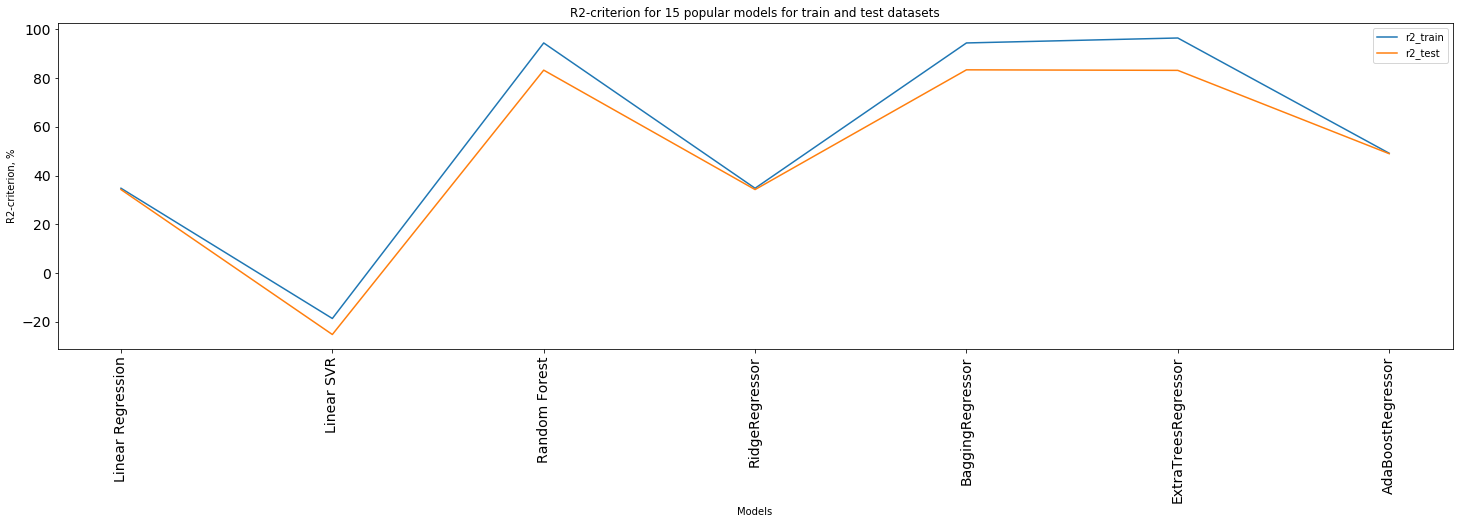

In [95]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

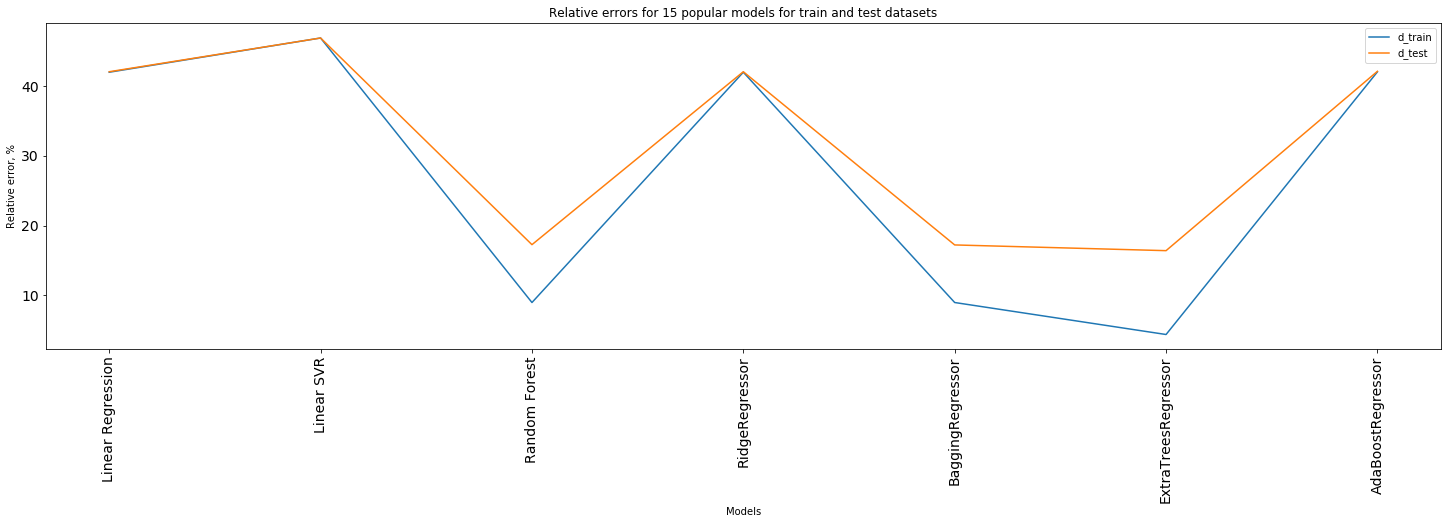

In [97]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

# SUJAY MODELING

In [214]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
# Reducing memory usage
#trial1 = reduce_mem_usage(trial1)


### Preparaing to model

In [27]:
y = trial1['price']
X = trial1.drop('price',axis=1)
X.head()

NameError: name 'trial1' is not defined

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.head()

,year,condition,cylinders,fuel,odometer,transmission,drive,type,ford,chevrolet,...,wrangler,accord,camry,altima,grand cherokee,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage
404545,2014.0,0,6,0,133875.000000,1,4,3,0,1,...,0,0,0,0,0,0,0,0,0,0
99507,1969.0,2,4,0,56030.000000,0,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
432713,2015.0,3,4,0,81000.000000,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
46203,2011.0,3,6,0,102669.000000,1,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
184746,2019.0,4,6,0,17193.923063,1,2,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [218]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(312894, 34) (312894,)
(134098, 34) (134098,)


In [219]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()   
#X_train= sc.fit_transform(X_train)
#X_test= sc.fit_transform(X_test)

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                       
# applying normalize ( ) to all columns 
trial1 = trial1.apply(normalize) 

X_train.head()

,year,condition,cylinders,fuel,odometer,transmission,drive,type,ford,chevrolet,...,wrangler,accord,camry,altima,grand cherokee,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage
404545,2014.0,0,6,0,133875.000000,1,4,3,0,1,...,0,0,0,0,0,0,0,0,0,0
99507,1969.0,2,4,0,56030.000000,0,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
432713,2015.0,3,4,0,81000.000000,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
46203,2011.0,3,6,0,102669.000000,1,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
184746,2019.0,4,6,0,17193.923063,1,2,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# Multiple Linear Regression

mlm = LinearRegression()
mlm.fit(X_train, y_train)
y_pred = mlm.predict(X_test)

#acc_model(0,mlm,X_train,X_test)

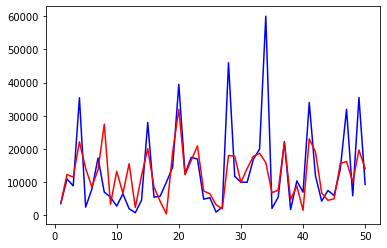

In [221]:
c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_test[0:50],color="blue",linestyle="-")
plt.plot(c,y_pred[0:50],color="red",linestyle="-")


In [222]:
import statsmodels.api as sm

X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
mlm1 = sm.OLS(y_train,X_train_sm).fit()
mlm1.params

C:\Users\sreeni\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const              -718630.702806
year                   359.376164
condition              840.037215
cylinders             1444.410731
fuel                  2222.516539
odometer                -0.080932
transmission         -1925.928654
drive                 1370.278436
type                   697.019712
ford                   867.993663
chevrolet              816.840311
toyota                2248.133341
ram                   1578.872748
honda                  774.795370
nissan               -1900.116499
jeep                 -1821.380647
gmc                     64.073783
dodge                 -375.059418
bmw                  -1671.505120
premium               2607.526329
f-150                 -605.596936
silverado 1500        -680.980693
1500                 -5114.330159
silverado              501.784378
2500                  2319.903579
wrangler              3659.900091
accord                 -73.415451
camry                -1055.507998
altima                 389.839168
grand cherokee

In [223]:
mlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:09:17   Log-Likelihood:            -3.2432e+06
No. Observations:              312894   AIC:                         6.486e+06
Df Residuals:                  312859   BIC:                         6.487e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.186e+05   4358.101   -164.895      0.000   -7.27e+05    -7.1e+05
year               359.3762      2.166    165.896      0.000     355.130     363.622
condition          840.0372     13.488     62.279      0.000     813.600     866.474
cylinders         1444.4107     12.736    113.415      0.000    1419.449    1469.372
fuel              2222.5165     16.965    131.008      0.000    2189.266    2255.767
odometer            -0.0809      0.000   -257.749      0.000      -0.082      -0.080
transmission     -1925.9287     47.641    -40.426      0.000   -2019.304   -1832.553
drive             1370.2784     14.928     91.793      0.000    1341.020    1399.537
type               697.0197      5.219    133.563      0.000     686.791     707.248
ford               867.9937     48.186     18.013      0.000     773.550     962.438
chevrolet          816.8403     51.483     15.866      0.000     715.936     917.745
toyota            2248.1333     61.239     36.711      0.000    2128.107    2368.160
ram               1578.8727     95.789     16.483      0.000    1391.129    1766.617
honda              774.7954     72.677     10.661      0.000     632.351     917.240
nissan           -1900.1165     72.749    -26.119      0.000   -2042.702   -1757.531
jeep             -1821.3806     91.710    -19.860      0.000   -2001.129   -1641.632
gmc                 64.0738     82.729      0.775      0.439     -98.072     226.220
dodge             -375.0594     79.009     -4.747      0.000    -529.915    -220.204
bmw              -1671.5051     96.297    -17.358      0.000   -1860.245   -1482.765
premium           2607.5263     58.404     44.646      0.000    2493.056    2721.997
f-150             -605.5969     99.090     -6.112      0.000    -799.811    -411.383
silverado 1500    -680.9807    123.582     -5.510      0.000    -923.197    -438.764
1500             -5114.3302    139.416    -36.684      0.000   -5387.581   -4841.079
silverado          501.7844    138.806      3.615      0.000     229.728     773.840
2500              2319.9036    160.922     14.416      0.000    2004.501    2635.306
wrangler          3659.9001    172.043     21.273      0.000    3322.700    3997.100
accord             -73.4155    170.187     -0.431      0.666    -406.978     260.147
camry            -1055.5080    168.421     -6.267      0.000   -1385.607    -725.409
altima             389.8392    173.662      2.245      0.025      49.467     730.211
grand cherokee      55.4328    180.916      0.306      0.759    -299.157     410.023
title_lien        2105.6574    174.643     12.057      0.000    1763.363    2447.952
title_missing    -1291.1362    490.993     -2.630      0.009   -2253.469    -328.803
title_parts only -5050.5247    945.504     -5.342      0.000   -6903.685   -3197.364
title_rebuilt    -3623.

In [224]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [225]:
# Calculating Vif value|
vif_cal(input_data=trial1, dependent_col="price")

,Var,Vif
0,year,25.68
5,transmission,11.91
2,cylinders,8.64
1,condition,7.03
6,drive,6.64
7,type,6.15
4,odometer,4.73
18,premium,4.52
11,ram,2.50
8,ford,2.26


In [227]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('year', 1)

# Create a second fitted model
mlm_2 = sm.OLS(y_train,X_train).fit()

print(mlm_2.summary())

KeyError: "['year'] not found in axis"

In [228]:
# Calculating Vif value for the second time
vif_cal(input_data=trial1.drop(["year"], axis=1), dependent_col="price")

,Var,Vif
1,cylinders,8.63
4,transmission,8.49
5,drive,6.19
6,type,6.11
0,condition,4.67
17,premium,4.50
3,odometer,4.35
10,ram,2.50
7,ford,2.24
13,jeep,2.10


In [229]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('transmission', 1)

# Create a second fitted model
mlm_3 = sm.OLS(y_train,X_train).fit()

print(mlm_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                          3.900e+04
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                        0.00
Time:                        21:14:13   Log-Likelihood:                     -3.2571e+06
No. Observations:              312894   AIC:                                  6.514e+06
Df Residuals:                  312862   BIC:                                  6.515e+06
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [230]:
X_train.head()

,condition,cylinders,fuel,odometer,drive,type,ford,chevrolet,toyota,ram,...,wrangler,accord,camry,altima,grand cherokee,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage
404545,0,6,0,133875.000000,4,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99507,2,4,0,56030.000000,2,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432713,3,4,0,81000.000000,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46203,3,6,0,102669.000000,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184746,4,6,0,17193.923063,2,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
# Calculating Vif value for the third time
vif_cal(input_data=trial1.drop(["year","transmission"], axis=1), dependent_col="price")

,Var,Vif
1,cylinders,8.31
5,type,6.08
4,drive,5.97
16,premium,4.43
3,odometer,4.05
0,condition,3.93
9,ram,2.49
6,ford,2.22
12,jeep,2.10
7,chevrolet,2.00


In [232]:
# Adding  constant variable to test dataframe
X_test_model3 = sm.add_constant(X_test)

# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_model3 = X_test_model3.drop(["year","transmission",'const'], axis=1)

#

C:\Users\sreeni\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [233]:
X_test_model3.head()

,condition,cylinders,fuel,odometer,drive,type,ford,chevrolet,toyota,ram,...,wrangler,accord,camry,altima,grand cherokee,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage
141244,2,6,0,154925.0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217513,3,6,0,100160.0,2,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101326,2,8,0,65000.0,4,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
426808,3,6,0,82948.0,4,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433314,4,6,0,117000.0,4,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
# Making predictions
y_pred_model3 = mlm_3.predict(X_test_model3)

In [235]:
rmse = sqrt(mean_squared_error(y_test, y_pred_model3))

print(rmse)

7942.36457341331


In [140]:
# Calculating Vif value for the third time
# vif_cal(input_data=trial1.drop(["year","transmission","cylinders"], axis=1), dependent_col="price")

In [141]:
#acc_model(0,mlm_3,X_train,X_test_model3)

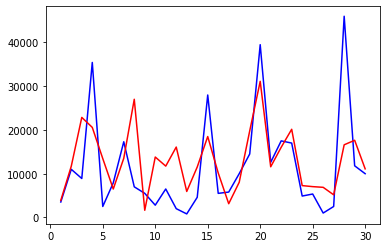

In [142]:
c = [i for i in range(1,31,1)]
fig = plt.figure()
plt.plot(c,y_test[0:30],color="blue",linestyle="-")
plt.plot(c,y_pred_model3[0:30],color="red",linestyle="-")

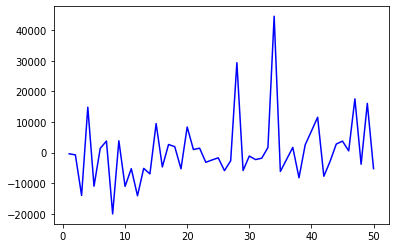

In [148]:
c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_test[0:50]-y_pred_model3[0:50],color="blue",linestyle="-")

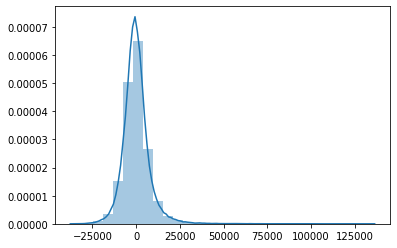

In [150]:
sns.distplot(y_test-y_pred_model3, bins=30)

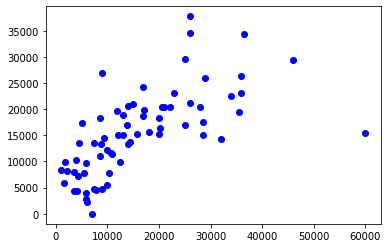

In [153]:
fig = plt.figure()
plt.scatter(y_test[30:100],y_pred_model3[30:100],color="blue",linestyle="-")

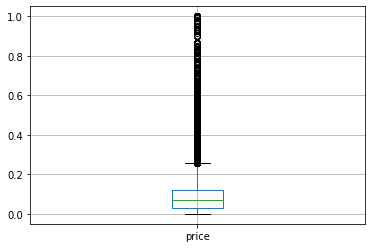

In [144]:
trial1.boxplot(column = "price")

### RFE

In [198]:
from sklearn.feature_selection import RFE

#X_train.shape

In [199]:
new_lm = LinearRegression()
rfe = RFE(new_lm, 29)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True False  True  True  True  True  True  True]
[1 1 1 1 6 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 1 1 1 1 1 1]


In [200]:
col_rfe = X_train.columns[rfe.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_rfe]

In [201]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
new_lm = sm.OLS(y_train,X_train_rfe).fit()   

C:\Users\sreeni\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [202]:
print(new_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     8524.
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:36:49   Log-Likelihood:            -3.2733e+06
No. Observations:              312894   AIC:                         6.547e+06
Df Residuals:                  312864   BIC:                         6.547e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.083e+06   4535.597  

In [186]:
col_rfe

Index(['year', 'condition', 'cylinders', 'fuel', 'transmission', 'drive',
       'type', 'chevrolet', 'toyota', 'ram', 'honda', 'nissan', 'jeep', 'gmc',
       'dodge', 'bmw', 'premium', 'f-150', 'silverado 1500', '1500',
       'silverado', '2500', 'wrangler', 'camry', 'grand cherokee',
       'title_lien', 'title_missing', 'title_parts only', 'title_rebuilt',
       'title_salvage'],
      dtype='object')

In [196]:
# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col_rfe]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

y_pred = new_lm.predict(X_test_rfe)

In [197]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

8341.682276989895


## Gradient Boosting Modelling - Ajith Kumar

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.utils import column_or_1d

In [29]:
cleaned=pd.read_csv("C:/Users/navii/OneDrive/Desktop/cleanedData.csv")
cleaned.drop(["url","lat","long","id","model","region"],axis=1,inplace=True)

cleaned["cylinders"]=cleaned["cylinders"].str.replace('cylinders','')

convert_dict={
        "cylinders":int
        }
cleaned=cleaned.astype(convert_dict)

cleaned.drop(cleaned[cleaned["title_status"]=="parts only"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="missing"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="lien"].index,inplace=True)

cleaned.drop(cleaned[cleaned["price"]<2000].index,inplace=True)
cleaned.drop(cleaned[cleaned["price"]>40000].index,inplace=True)


In [30]:
northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]

for index, row in cleaned.iterrows():
    if(row["state"] in northeast):
        cleaned.at[index,"state"]="northeast"
    if(row["state"] in midwest):
        cleaned.at[index,"state"]="midwest"
    if(row["state"] in south):
        cleaned.at[index,"state"]="south"
    if(row["state"] in west):
        cleaned.at[index,"state"]="west"

In [31]:
yearmed=cleaned["year"].median()
cleaned["year"].fillna(yearmed)
for index, row in cleaned.iterrows():
    if(row["year"]>2020):
        cleaned.at[index,"year"]=yearmed

In [32]:
y=cleaned["price"]
x=cleaned.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
30231,2003.0,buick,salvage,6,gas,149144.0,clean,automatic,2wd,sedan,white,midwest
246989,2010.0,nissan,excellent,6,gas,115724.0,clean,automatic,4wd,pickup,black,northeast
10076,2016.0,nissan,good,6,gas,63491.0,clean,automatic,4wd,other,white,south
75940,2010.0,chevrolet,salvage,4,gas,129874.0,clean,manual,2wd,SUV,white,west
38659,2017.0,jeep,excellent,6,gas,91315.0,clean,automatic,4wd,sedan,white,midwest


In [33]:
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()
x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()
x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin))

In [34]:
y_trmin=y_train.min()
y_trmax=y_train.max()
y_train=((y_train-y_trmin)/(y_trmax-y_trmin)) 

In [35]:
x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin)) 

In [36]:
y_test=((y_test-y_trmin)/(y_trmax-y_trmin)) 

In [37]:
class LabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique().sort()
        return self

ordinal_columns=["cylinders"]

for col in ordinal_columns:
     le = LabelEncoder()
     le.fit_transform(list(x_train[col].values))
     x_train[col] = le.transform(list(x_train[col].values))

for col in ordinal_columns:
    le.fit(list(x_test[col].values))
    x_test[col] = le.transform(list(x_test[col].values))

In [38]:
xx_train=pd.get_dummies(x_train)
xx_test=pd.get_dummies(x_test)

missing_cols=set(xx_train.columns)-set(xx_test.columns)
for val in missing_cols:
    xx_test[val]=0
    
xx_test=xx_test[xx_train.columns]

In [39]:
xx_train.head()

,year,cylinders,odometer,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_rebuilt,transmission_automatic,transmission_manual,transmission_other,drive_1wd,drive_2wd,drive_3wd,drive_4wd,drive_5wd,drive_6wd,drive_7wd,type_SUV,type_convertible,type_coupe,type_hatchback,type_mini-van,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
8703,0.833333,1,0.112365,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
352280,0.800000,3,0.176027,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
195404,0.866667,1,0.060601,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
288540,0.533333,3,0.166745,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
205629,0.833333,1,0.154849,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [14]:
def train_GB(est,max_depth,lr):
    params={'n_estimators': est, 'max_depth': max_depth,'learning_rate': lr}
    gb=ensemble.GradientBoostingRegressor(**params)
    gb_model=gb.fit(xx_train,y_train)
    y_pred=gb_model.predict(xx_test)
    yy_pred=(y_pred*(y_trmax-y_trmin))+(y_trmin)
    yy_test=(y_test*(y_trmax-y_trmin))+(y_trmin)
    ybar=np.sum(yy_test)/len(yy_test)
    sse = np.sum((yy_test-yy_pred)**2)  
    sst = np.sum((yy_test - ybar)**2) 
    rsq=1-(sse/sst)
    print("{}---> NEstimators{}-MaxDepth{}-LearningRate{}".format(rsq,est,max_depth,lr))

In [15]:
for n_est in range(450,550,50):
    for max_depth in range(7,9,1):
        for lr in [0.05,0.1]:
            train_GB(n_est,max_depth,lr)

0.8090948073364165---> NEstimators450-MaxDepth7-LearningRate0.05
0.8226493253037988---> NEstimators450-MaxDepth7-LearningRate0.1
0.8183136651731122---> NEstimators450-MaxDepth8-LearningRate0.05
0.8319337033460186---> NEstimators450-MaxDepth8-LearningRate0.1
0.8109993238813118---> NEstimators500-MaxDepth7-LearningRate0.05
0.825427557312977---> NEstimators500-MaxDepth7-LearningRate0.1
0.8202867856993565---> NEstimators500-MaxDepth8-LearningRate0.05
0.8339254360118047---> NEstimators500-MaxDepth8-LearningRate0.1


In [16]:
params={'n_estimators': 500, 'max_depth': 8,'learning_rate': 0.1}
gb=ensemble.GradientBoostingRegressor(**params)
gb_model=gb.fit(xx_train,y_train)
y_pred=gb_model.predict(xx_test)
yy_pred=(y_pred*(y_trmax-y_trmin))+(y_trmin)
yy_test=(y_test*(y_trmax-y_trmin))+(y_trmin)

In [17]:
mse = mean_squared_error(yy_test,yy_pred)
rmse=sqrt(mse)
rmse
print("Root Mean Squared Error={}".format(rmse))

ybar=np.sum(yy_test)/len(yy_test)
sse = np.sum((yy_test-yy_pred)**2)  
sst = np.sum((yy_test - ybar)**2) 
rsq=1-(sse/sst)
print("R-Squared={}".format(rsq))

Root Mean Squared Error=3676.1574707981813
R-Squared=0.8339183215066108


# NAVYA

In [40]:
# Preprocessing, label encoding, train & test split.
# xx_train train data input and y_train train data output
# xx_test test data input and y_test test data output

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(xx_train,y_train)
print('R^2 score, Coefficient of determination:',regressor.score(xx_test, y_test))
y_pred = regressor.predict(xx_test)

# Denormalize
yy_pred=(y_pred*(y_trmax-y_trmin))+(y_trmin)
yy_test=(y_test*(y_trmax-y_trmin))+(y_trmin)

# Metrics
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(yy_test, yy_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(yy_test, yy_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(yy_test, yy_pred)),2))


R^2 score, Coefficient of determination: 0.8786760891744898
Mean Absolute Error: 1838.84
Mean Squared Error: 9933026.93
Root Mean Squared Error: 3151.67


In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(xx_train,y_train)
print(regressor.score(xx_test, y_test))
y_pred = regressor.predict(xx_test)

# Denormalize
yy_pred=(y_pred*(y_trmax-y_trmin))+(y_trmin)
yy_test=(y_test*(y_trmax-y_trmin))+(y_trmin)


# Metrics
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(yy_test, yy_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(yy_test, yy_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(yy_test, yy_pred)),2))

0.8837469869178901
Mean Absolute Error: 1790.09
Mean Squared Error: 9517862.57
Root Mean Squared Error: 3085.1


# MITHRA